# **Neural Networks & Intelligent Systems**
## **ECE NTUA, Flow Y, 9th Semester, 2021-2022**
### *Lab 1: Supervised Learning (Classification)*
### Part 2: Kaggle

#### Team 20

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import optuna
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MultiLabelBinarizer
import time
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from io import StringIO
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.dummy   import DummyClassifier
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sloan-digital-sky-survey-dr16/Skyserver_12_30_2019 4_49_58 PM.csv


## Στόχος του dataset

#### Το dataset μας είναι το K03 και περιγράφει την τρισδιάστατη απεικόνιση του σύμπαντος με μορφή χαρτών,χρησιμοποιώντας εικόνες πολλαπλών χρωμάτων του ενός τρίτου του ουρανού και το φάσμα περισσότερων από 3 εκατομμυρίων αστρονομικών αντικειμένων. Πιο αναλυτικά το dataset αποτελείται από τον συνδυασμό φωτομετρικών και φασματικών δεδομένων. Κάθε κλάση αντικειμένου περιγράφεται απο 16 μεταβλητές που προσδιορίζουν την θέση και την κατάσταση κάθε αντικειμένου στην διάρκεια του χρόνου.

## Οπτικοποήση και επισκόπηση του dataset

In [ ]:
data = pd.read_csv("/kaggle/input/sloan-digital-sky-survey-dr16/Skyserver_12_30_2019 4_49_58 PM.csv")
data

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,STAR,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,STAR,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,STAR,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1237667968033620000,228.674917,19.179460,19.32631,18.82748,18.65659,18.60481,18.60917,5237,301,5,134,4448615345201370000,QSO,0.438182,3951,55681,672
99996,1237664818210470000,173.757382,36.441603,18.33687,17.30365,17.16037,17.14895,17.14419,4504,301,2,111,2265404129658560000,STAR,-0.000497,2012,53493,340
99997,1237664295297290000,205.426531,38.499053,17.50690,15.63152,15.22328,15.04469,15.28668,4382,301,4,97,2257446413900210000,GALAXY,0.004587,2005,53472,62
99998,1237656537513130000,337.135144,-9.635967,19.33946,17.21436,16.29697,15.86745,15.51556,2576,301,2,105,811847537492257000,GALAXY,0.084538,721,52228,268


#### Δεν χρειάστηκε κάποια αλλαγή plain text για την εισαγωγή του dataset.

In [ ]:
data.shape

(100000, 18)

#### Άρα το πλήθος των δειγμάτων είναι 99999

In [ ]:
features = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17]]
print(features)

                     objid          ra        dec         u         g  \
0      1237666301628060000   47.372545   0.820621  18.69254  17.13867   
1      1237673706652430000  116.303083  42.455980  18.47633  17.30546   
2      1237671126974140000  172.756623  -8.785698  16.47714  15.31072   
3      1237665441518260000  201.224207  28.771290  18.63561  16.88346   
4      1237665441522840000  212.817222  26.625225  18.88325  17.87948   
...                    ...         ...        ...       ...       ...   
99995  1237667968033620000  228.674917  19.179460  19.32631  18.82748   
99996  1237664818210470000  173.757382  36.441603  18.33687  17.30365   
99997  1237664295297290000  205.426531  38.499053  17.50690  15.63152   
99998  1237656537513130000  337.135144  -9.635967  19.33946  17.21436   
99999  1237670459113730000   37.440188  25.400888  18.11769  16.86279   

              r         i         z   run  rerun  camcol  field  \
0      16.55555  16.34662  16.17639  4849    301       5

#### Τα χαρακτηριστικά μας είναι 17,δηλαδή όλες οι στήλες εκτός της στήλης 13.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   objid      100000 non-null  int64  
 1   ra         100000 non-null  float64
 2   dec        100000 non-null  float64
 3   u          100000 non-null  float64
 4   g          100000 non-null  float64
 5   r          100000 non-null  float64
 6   i          100000 non-null  float64
 7   z          100000 non-null  float64
 8   run        100000 non-null  int64  
 9   rerun      100000 non-null  int64  
 10  camcol     100000 non-null  int64  
 11  field      100000 non-null  int64  
 12  specobjid  100000 non-null  uint64 
 13  class      100000 non-null  object 
 14  redshift   100000 non-null  float64
 15  plate      100000 non-null  int64  
 16  mjd        100000 non-null  int64  
 17  fiberid    100000 non-null  int64  
dtypes: float64(8), int64(8), object(1), uint64(1)
memory usage: 13.7+

#### Ο τύπος των χαρακτηριστικών μας αναγράφεται στην στύλη Dtype του παραπάνω πίνακα. Επικεφαλίδες υπάρχουν πάνω από κάθε στήλη και επιπλέον υπάρχει και αρίθμηση γραμμών στο λεξικό μας.

In [ ]:
labels = data['class']
labels = {'STAR':0, 'GALAXY':1, 'QSO':2}
data.replace({'class':labels}, inplace = True)
print(labels)

{'STAR': 0, 'GALAXY': 1, 'QSO': 2}


#### Στο dataset μας έχουμε ως label την στήλη 'class'(στήλη 13) η οποία προσδιορίζει αν το ουράνιο αντικείμενο είναι 'αστέρι η γαλαξίας η QSO'.Έπειτα κωδικοποιούμε τις ετικέτες με τους αριθμούς 1,2,3 αντίστοιχα για παραπάνω ευκολία. 

### Κατηγορικά - Αριθμητικά χαρακτηριστικά
### 
#### Το dataset μας έχει μόνο αριθμητικά χαρακτηριστικά καθώς υπάρχουν μόνο χαρακτηριστικά τύπου int και float με αριθμητικες τιμές.

## Απουσιάζουσες τιμές

In [ ]:
check = data.isnull().values.any()
print(check)

False


####  Άρα το dataset μασ δεν έχει απουσιάζουσες τιμές.

## Μηδενικά

In [ ]:
cnt = 0
for x in features:
    for y in x:
        if (y==0):
            cnt+=1
print(cnt)

0


####  Άρα το dataset μας δεν έχει μηδενικά

## Balance

In [ ]:
data['class'].value_counts()

1    51323
0    38096
2    10581
Name: class, dtype: int64

####  Το πλήθος των κλάσεων είναι 3 και συνολικά έχουμε 100000 δείγματα. Η κλάση 1 (Star) είναι 38.096% του συνόλου, η κλάση 2 (Galaxy) είναι 51.323% του συνόλου και η κλάση 3 (QSo) είναι 10.581%. Άρα το dataset μας είναι imbalanced καθώς οι κλάσεις 1 και 2 είναι πάνω από 1,5 φορά μεγαλύτερες από την κλάση 3. Παρακάτω οπτικοποιούμε τα παραπάνω αποτελέσματα.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='class', ylabel='count'>

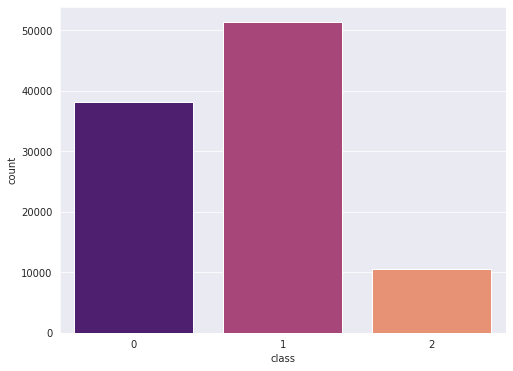

In [ ]:
sns.set_style('darkgrid')

plt.figure(figsize = (8,6))

sns.countplot(data['class'], palette = 'magma')

## Feature Drop

#### Όσον αφορά τα χαρακτηριστικά μας παρατηρούμε πως δεν σχετίζονται όλα με το είδος του ουράνιου αντικειμένου οπότε και θα τα αφαιρέσουμε από το dataset μας. Πιο συγκεκριμένα τα χαρακτηριστικά 'objid' και 'specobjid' αφορούν μόνο στην παρουσίαση του dataset και την επιστροφή των στηλών. Οπότε δεν αφορούν το classification των αντικειμένων μας και έτσι τα αποβάλλουμε. Επιπλέον, τα χαρακτηριστικά 'run', 'rerun', 'camcol', 'field' και 'fiberid' αφορούν στοιχεία της κάμερας που φωτογράφισε τα αντικείμενα μας και έτσι δεν έχουν σχέση με την κατηγοριοπίηση των αντικειμένων και έτσι τα αποβάλλουμε.

In [ ]:
data.drop(['run', 'rerun', 'camcol', 'field', 'objid', 'specobjid', 
              'fiberid'], axis = 1, inplace = True)

data.head(3)

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd
0,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,0,0.000115,7255,56597
1,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,0,-0.000093,8290,57364
2,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,0,0.000165,2861,54583


<AxesSubplot:>

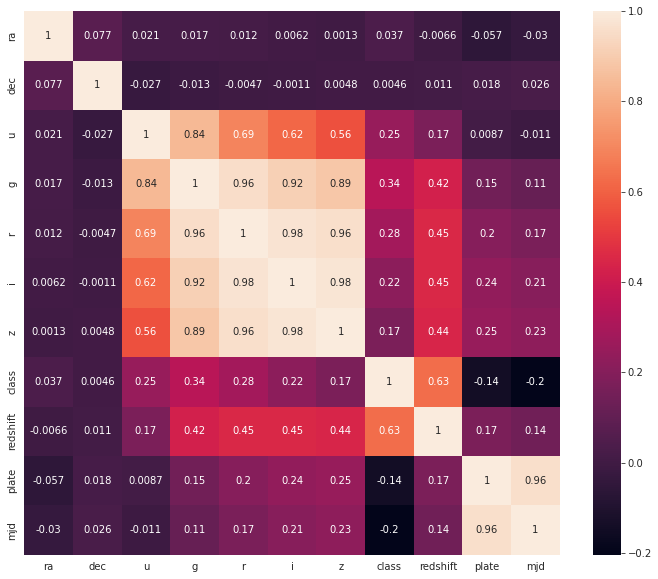

In [ ]:
corr = data.corr()

plt.figure(figsize = (12,10))

sns.heatmap(corr, annot = True)

## Train and test split

#### Παρακάτω χωρίζουμε τα δεδομένα μας σε train και test 

In [ ]:
X = data.drop('class', axis = 1).values
Y = data['class'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

## Baseline Classification

#### Θα ξεκινήσουμε την ενότητα του classification με την εισαγωγή  dummy classifiers για να έχουμε ένα baseline για τους υπόλοιπους ταξινομητές μας.

## Μετρικές 


#### Για τους ταξινομητές μας θα επιλέξουμε τις μετρικές accuracy και f1_macro. Το accuracy αποτελεί την πιο απόλυτη μετρική και θα την χρησιμοποιήσουμε καθώς στο dataset μας, μας απασχολεί η ορθότητα αναγνώρισης της κάθες κλάσης από τον ταξινομητή μας για την σωστή χαρτογράφηση του σύμπαντος. Η f1_macro επιλέγεται καθώς έχουμε multiclass classification και μας ενδιαφέρει η βαρύτητα της κάθε κλάσης ξεχωριστά. Παράλληλα, δεν μας ενδιαφέρουν οι μετρικές precision και recall, καθώς μας ενδιαφέρει η μακροχρόνια παρατήρηση του σύμπαντος και άρα δεν μας απασχολούν τα false negative kai false positive metrics.

In [ ]:
f1_macro = {}

 Strategy: uniform

F1 macro 
0.30957558099314486 



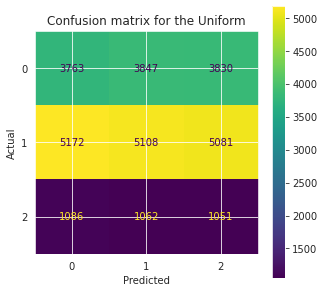

In [ ]:
dc_uniform = DummyClassifier(strategy="uniform")
dc_uniform.fit(x_train,y_train)

preds = dc_uniform.predict(x_test)

print('\033[1m'+" Strategy: uniform"+'\033[0m'+"\n")

f1_macro['Unif']=f1_score(y_test,preds,average='macro')

print("F1 macro ")
print(f1_macro['Unif'],"\n")

fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(dc_uniform, x_test, y_test,ax=ax)  
plt.title('Confusion matrix for the Uniform')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  

Strategy: Most Frequent

F1 macro 
0.2257592792633907 



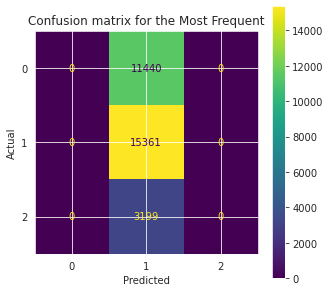

In [ ]:
# Strategy: Most Frequent
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_most_frequent.fit(x_train,y_train)

pred_MF = dc_most_frequent.predict(x_test)

print('\033[1m'+"Strategy: Most Frequent"+'\033[0m'+"\n")

f1_macro['MFreq']=f1_score(y_test,pred_MF,average='macro')

print("F1 macro ")
print(f1_macro['MFreq'],"\n")

fig, ax = plt.subplots(figsize=(5,5))
plot_confusion_matrix(dc_most_frequent, x_test, y_test, ax=ax)
plt.title('Confusion matrix for the Most Frequent')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  

Strategy: stratified



F1 macro 
0.3304885503944546 



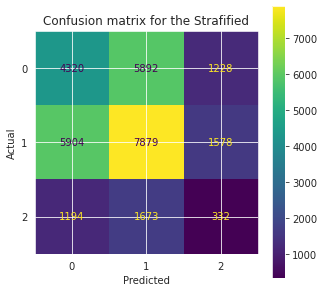

In [ ]:
# Strategy: Strafified
dc_stratified = DummyClassifier(strategy="stratified")
dc_stratified.fit(x_train,y_train)

pred_Strat = dc_stratified.predict(x_test)

print('\033[1m'+"Strategy: stratified"+'\033[0m'+"\n")

f1_macro['Strat']=f1_score(y_test,pred_Strat,average='macro')
print('\n')
print("F1 macro ")
print(f1_macro['Strat'],"\n")

fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(dc_stratified, x_test, y_test,ax=ax)
plt.title('Confusion matrix for the Strafified')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  

SVM


              precision    recall  f1-score   support

           0       0.61      0.67      0.64     11440
           1       0.69      0.78      0.73     15361
           2       0.00      0.00      0.00      3199

    accuracy                           0.66     30000
   macro avg       0.43      0.48      0.46     30000
weighted avg       0.59      0.66      0.62     30000
 


F1 macro 
0.45756654926485313 



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


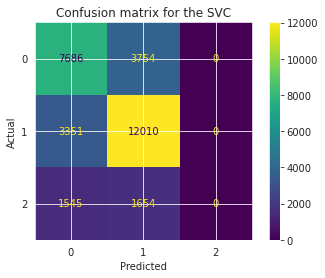

In [ ]:
 svc = SVC()

svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)

print('\033[1m'+"SVM"+'\033[0m'+"\n\n")
print(classification_report(y_test,svc_pred),"\n\n")

f1_macro['SVC']=f1_score(y_test,svc_pred,average='macro')

print("F1 macro ")
print(f1_macro['SVC'],"\n")

plot_confusion_matrix(svc, x_test, y_test)  
plt.title('Confusion matrix for the SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  

Multilayer Perceptron


              precision    recall  f1-score   support

           0       0.57      0.79      0.66     11440
           1       0.83      0.57      0.67     15361
           2       0.74      0.85      0.80      3199

    accuracy                           0.68     30000
   macro avg       0.71      0.74      0.71     30000
weighted avg       0.72      0.68      0.68     30000
 


F1 macro 
0.7103796291928596 



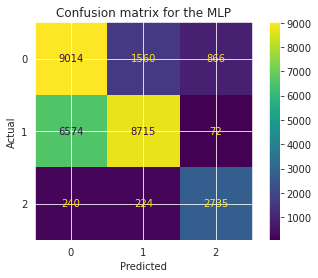

In [ ]:
MLP = MLPClassifier()

MLP.fit(x_train,y_train)
mlp_pred = MLP.predict(x_test)

print('\033[1m'+"Multilayer Perceptron"+'\033[0m'+"\n\n")
print(classification_report(y_test,mlp_pred),"\n\n")

f1_macro['MLP']=f1_score(y_test,mlp_pred,average='macro')

print("F1 macro ")
print(f1_macro['MLP'],"\n")

plot_confusion_matrix(MLP, x_test, y_test)  
plt.title('Confusion matrix for the MLP')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  


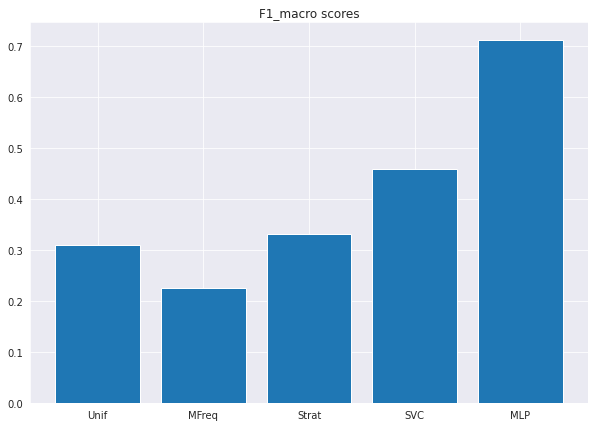

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)


plt.title('F1_macro scores')
plt.bar(range(len(f1_macro)), list(f1_macro.values()), align='center')
plt.xticks(range(len(f1_macro)), list(f1_macro.keys()))
plt.grid(True)

plt.show()

### Σχολιασμός :
### 
#### Με βάση τα παραπάνω παρατηρούμε πως η επίδοση του ταξινομητή SVM στo out of the box classification είναι αρκετά χαμηλή καθώς δεν διαφέροει σημαντικά από τους dummy classifiers. Αυτό το αποτέλεσμα μπορεί να ερμηνευτεί από το γεγονός ότι δεν χρησιμοποιήθηκαν υπερπαράμετροι (εξού και out of the box) , από το πολύ μεγάλο imbalance του dataset που οδηγεί τους ταξινομητές να αγνοούν την μικρότερη σε συχνότητα κλάση και από το γεγονός πως τα χαρακτηριστικά μας δεν είναι κανονικοποιημένα. Όλα τα παραπάνω μας δίνουν αρκετό έδαφος για βελτιστοποίηση στα παρακάτω βήματα και για τους 2 ταξινομητές.

### ****Βελτιστοποίηση ταξινομητών****

### Προεπεξεργασία δεδομένων 
#### 
#### Δεν έχουμε απουσιάζουσες τιμές χαρακτηριστικών, άρα δεν υπάρχει κάποια βελτιστοποίηση να πραγματοποιηθεί στο συγκεκριμένο κομμάτι.
#### 
#### Όλα μας τα χαρακτηριστικά είναι αριθμητικά, κι έτσι δεν υπάρχει κάποια τροποποίηση που πρέπει να γίνει στα δεδομένα μας.
#### 
#### Αρχικά θα προχωρήσουμε σε κανονικοποίηση του dataset. Επιπλέον το dataset μας είναι imbalanced οπότε πρέπει να το εξισορροπήσουμε. Θα δουλέψουμε από κάτω προς τα πάνω δηλαδή θα εφαρμόζουμε μια μια τις τεχνικές βελτιστοποίησης και θα παρατηρούμε τα αποτελέσματα στους ταξινομητές μας μέχρι να παρατηρήσουμε τα καλύτερα scores για αυτες τις δύο τεχνικές. Τέλος θα δουλέψουμε ξεχωριστά για τον κάθε ταξινομητή με την χρήση της βιβλιοθήκης Optuna για να βρούμε τις καλύτερες υπερπαραμέτρους.

### Scaling
#### 
#### Επιλέγουμε τον min-max scaler καθώς οι τιμές του dataset μας έχουν μεγάλες διαφορές και θέλουμε να τις εξισορροπήσουμε γύρω από το διάστημα [0,1].Τα SVM αποτελούν διαχωριστικούς ταξινομητές, οι οποίοι καθώς επιδιώκουν να βρουν μια ευθεία (ή καμπύλη) ή πολύπτυχο (για περισσότερες διαστάσεις) τα οποία να διαχωρίζουν / διακρίνουν τις κατηγορίες μεταξύ τους, συμφέρει να περιορίσουμε τις τιμές μας στο [0,1] για την μείβση των διαστημάτων αναζήτησης. Επιπλέον στο documεntation του MLP αναφέρεται πως είναι ιδιαίτερα sensitive στην κανονικοποίηση και άρα αυτή η τεχνική ενδείκνυται για την βελτιστοποίση του. Παρενθεση : Στο kaggle στο section 'code' όπου υπάρχουν εργασίες classification από άλλους ερευνητές πάνω στο συγκεκριμένο dataset προτείνεται η χρήση του Robust scaler. Στην δοκιμή που κάναμε φαίνεται να δίνει οριακά καλύτερα αποτελέσματα από τον minmax και να βελτιώνει ελάχσιτα τα scores. Παρόλα αυτά για τους σκοπούς του μαθήματος δεν χρησιμοποιήθηκε καθώς δεν θεωρήθηκε θεμιτό να παρθεί έτσι μια πηγή χωρίς να έχουμε κάποιο πρότερο στοιχείο για την χρήση της.Παρόλα αυτά αναφέρεται σε αυτή την παρένθεση για ερευνητικούς σκοπούς και για χάριν εύρεσης της βέλτιστης λύσης.

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(x_train)
#print(X_train_minmax, "\n")
X_test_minmax = min_max_scaler.transform(x_test)
#print(X_test_minmax)

### Balance
### 
#### Χρησιμοποιούμε την μέθοδο under sampling καθώς έχουμε πολύ μεγάλο, σε μέγεθος, dataset και η διαδικασία αυτή προτιμάται για την μείωση του υπολογιστικού κόστους. Η ιδέα για την χρήση αυτής της μεθόδου προήλθε από το γεγονός πως οι classifiers δουλεύουν καλύτερα σε ισορροπημένα sets και το δικό μας παρουσίαζε μεγάλο imbalnce ιδιαίτερα στην 3η κλάση. Ένας κίνδυνος που προκύπτει από το under sampling είναι η απώλεια σημαντικών δειγμάτων, όμως θεωρούμε πως στην συγκεκριμένη περίπτωση δεν θα επηρεάσει την μελέτη μας καθώς (παρά το feaute drop που εφαρμόσαμε στο πρώτο μέρος) αρκετά από τα χαρακτηριστικά μας έχουν μικρές τιμές και διακύμνση και έτσι δεν χάνουμε ιδιαίτερα σημαντική πληροφορία. 

In [ ]:
sampler = RandomUnderSampler()
X_resampled, y_resampled = sampler.fit_resample(X_train_minmax, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 7382), (1, 7382), (2, 7382)]


#### PCA
##### Tέλος θα εφαρμόσουμε την μέθοδο ανάλυσης σε κύριες συνιστώσες. Έπειτα από πειραματισμό παρατηρήσαμε πως για όλα τα n μέσα στο αποδεκτό διάστημα παρατηρήθηκε μείωση της απόδοσης και των δύο ταξινομητών. Συγκεκριμένα για τις τιμές 8,9,10 ο MLP παρουσίαζε οριακή μείωση των μετρικών ενώ ο SVM καθαρή μείωση. Στις τιμές <8 και οι δυο ταξινομητές παρουσιάζουν πολύ αισθητή μείωση επιδόσεων με τον SVM να φτάνει σε ποσοστά μικρότερα του out of the box. Γι αυτό τον λόγο επιλέγουμε να μην εφαρμόσουμε την μέθοδο pca στο dataset μας. Παρακάτω παραθέτουμε σε σχόλια τις δοκιμές που έγιναν και τελικά δεν χρησιμοποιήθηκαν. 

In [ ]:
# n = 1,2,3,4,5,6,7,8,9,10
# pca = PCA(n_components=n)
# trainPCA = pca.fit_transform(X_resampled)
# testPCA = pca.transform(X_test_minmax)
# print(X_resampled.shape)
# print(trainPCA.shape)
# print("")
# print(testPCA.shape)

#### 

<!-- ### Scaling
### 
#### Το scikit learn στο documantation του MLP λέει πως ο συγκεκριμένος ταξινομητής είναι ιδιαίτερα sensitive στο scaling δηλαδή ότι με το κατάλληλο scaling αποφέρει πολύ καλύτερα αποτελέσματα. Έτσι εφαρμόζουμε τον Robust scaler του οποίου η ιδέα μας δόθηκε από την παρουσίαση του dataset του kaggle και διαβάσαμε περισσότερα εδώ :https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html. Ο συγκεκριμένος scaler ουσιαστικά εφαρμόζει πρώτα centering στα δεδομένα μας και έπειτα τα κανονικοποιεί. -->

### MLP optimazation

#### Για την βελτιστοποίηση του MLP θα χρησιμοποιήσουμε την βιβλιοθήκη optuna. Δημιουργούμε μια συνάρτηση objective η οποία μέσω του study της optuna θα μας προτείνει τιμές υπερπαραμέτρων με γνώμονα την αύξηση της ορθότητας. Τρέχουμε 100 trials και παρακάτω φαίνεται μια απο τις προσπάθειες μας όπου πετύχαμε accuracy 88,5.

In [ ]:
def objective(trial):
    
    classifier_name = trial.suggest_categorical("classifier", ["MLP"])
    
    if classifier_name=="MLP":
        hidden_layers_sizes = trial.suggest_int('hidden_layers_sizes',8,256)
        activations = trial.suggest_categorical('activation',['logistic', 'tanh', 'relu'])
        solvers = trial.suggest_categorical('solver',['adam'])
        max_iters = trial.suggest_int('max_iter',50,400,50)
        learning_rates = trial.suggest_categorical('learning_rate',['constant', 'invscaling', 'adaptive'])
        alphas = trial.suggest_loguniform('alpha',0.001, 1)
        clf = MLPClassifier(hidden_layer_sizes=hidden_layers_sizes,activation=activations,learning_rate=learning_rates,alpha=alphas,max_iter=max_iters)
    clf.fit(X_resampled,y_resampled)
    return clf.score(X_test_minmax, y_test)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2021-12-05 11:30:24,907] A new study created in memory with name: no-name-22380e12-3fc5-4ccd-b7e5-9b70b4ed5240
[I 2021-12-05 11:30:40,552] Trial 0 finished with value: 0.8294333333333334 and parameters: {'classifier': 'MLP', 'hidden_layers_sizes': 46, 'activation': 'logistic', 'solver': 'adam', 'max_iter': 250, 'learning_rate': 'adaptive', 'alpha': 0.18051984894851278}. Best is trial 0 with value: 0.8294333333333334.
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[I 2021-12-05 11:31:05,284] Trial 1 finished with value: 0.9059333333333334 and parameters: {'classifier': 'MLP', 'hidden_layers_sizes': 32, 'activation': 'logistic', 'solver': 'adam', 'max_iter': 300, 'learning_rate': 'invscaling', 'alpha': 0.041151439314721205}. Best is trial 1 with value: 0.9059333333333334.
/opt/conda/li

#### Σημείωση : θέσαμε ως default solver τον adam καθώς προτείνεται από το sklearn για multiclass classification με πολύ μεγάλα datasets. Όταν βάλαμε στο optuna και τους υπόλοιπους solver παρατηρήθηκε error σχετικά με το decode των strings και έτσι δεν μπορέσαμε να τους εισάγουμε στην objective και θεωρήσαμε την default = adam.

#### Έπειτα παίρνουμε αυτές τις υπερπαραμέτρους και δοκιμάζουμε ξανά τον classifier για να δούμε πιο αναλυτικά το confusion matrix. 

Multilayer Perceptron


              precision    recall  f1-score   support

           0       0.97      1.00      0.98     11397
           1       0.99      0.97      0.98     15450
           2       0.94      0.97      0.95      3153

    accuracy                           0.98     30000
   macro avg       0.97      0.98      0.97     30000
weighted avg       0.98      0.98      0.98     30000
 


F1 macro 
0.9725025066781919 



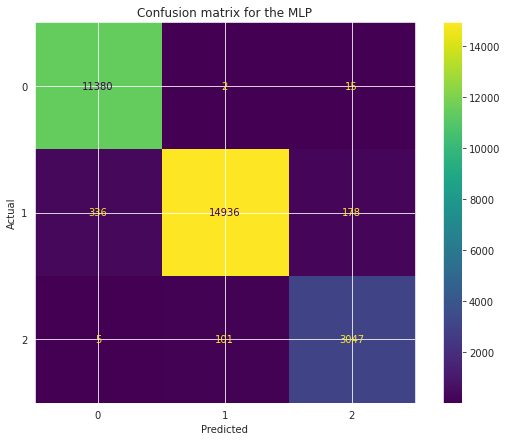

In [ ]:
clf = MLPClassifier(hidden_layer_sizes= 57,activation='tanh',solver='adam',learning_rate='constant',alpha=0.0019146130015935052,max_iter =300)

clf.fit(X_resampled,y_resampled)
mlp_pred = clf.predict(X_test_minmax)

print('\033[1m'+"Multilayer Perceptron"+'\033[0m'+"\n\n")
print(classification_report(y_test,mlp_pred),"\n\n")

f1_macro['MLP']=f1_score(y_test,mlp_pred,average='macro')

print("F1 macro ")
print(f1_macro['MLP'],"\n")

plot_confusion_matrix(clf, X_test_minmax, y_test)  
plt.title('Confusion matrix for the MLP')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  

#### Παρατηρούμε πως έχουμε ιδιαίτερα μεγάλη βελτίωση καθώς και το accuracy και το f1_macro που μας ενδιαφέρουν παρουσιάζουν άνοδο 27 μονάδων accuracy και 37 στο f1_macro. Έτσι το βέλτιστο μοντέλο MLP (με βάση τις εμπειρικές μας παρατηρήσεις και τα αποτελέσματα της optuna) είναι το μοντέλο (Min_Max_Scaler,Random_Under_Sampler,hidden_layer_sizes= 57,activation='tanh',solver='adam',learning_rate='constant',alpha=0.0019146130015935052,max_iter =300). 

### SVM Optimazation

In [ ]:
def objective1(trial):
    
    classifier_name = trial.suggest_categorical("classifier", ["SVC"])
    if classifier_name=="SVC":
            
        C = trial.suggest_loguniform('C', 1, 10)
        kernel = trial.suggest_categorical('kernel',['poly','rbf','sigmoid'])
        degree = trial.suggest_int('degree',1, 50)
        gamma = trial.suggest_categorical('gamma',['scale', 'auto'])
        clf = SVC(C=C,kernel=kernel,degree=degree,gamma=gamma)
    clf.fit(X_resampled,y_resampled)    
    return clf.score(X_test_minmax, y_test)

study = optuna.create_study(direction='maximize')
study.optimize(objective1, n_trials=50)

[I 2021-12-05 17:48:14,386] A new study created in memory with name: no-name-c1a0ce5d-9757-43a0-89b5-08652bee3a84
[I 2021-12-05 17:48:37,406] Trial 0 finished with value: 0.8667333333333334 and parameters: {'classifier': 'SVC', 'C': 1.4264436648322847, 'kernel': 'rbf', 'degree': 12, 'gamma': 'auto'}. Best is trial 0 with value: 0.8667333333333334.
[I 2021-12-05 17:49:09,718] Trial 1 finished with value: 0.5116666666666667 and parameters: {'classifier': 'SVC', 'C': 1.0723595613324306, 'kernel': 'poly', 'degree': 29, 'gamma': 'auto'}. Best is trial 0 with value: 0.8667333333333334.
[I 2021-12-05 17:49:30,664] Trial 2 finished with value: 0.8829666666666667 and parameters: {'classifier': 'SVC', 'C': 2.2466902395620325, 'kernel': 'rbf', 'degree': 29, 'gamma': 'auto'}. Best is trial 2 with value: 0.8829666666666667.
[I 2021-12-05 17:49:49,952] Trial 3 finished with value: 0.8992333333333333 and parameters: {'classifier': 'SVC', 'C': 3.674594707219576, 'kernel': 'rbf', 'degree': 48, 'gamma':

#### Μετά από πολλές δοκιμές στο optuna με n=100 kai n=50 καταλήγουμε πως το βέλτιστο μοντέλο για τον SVM είναι 'C': 9.101481758647843, 'kernel': 'poly', 'degree': 7, 'gamma': 'scale'
#### Έπειτα παίρνουμε αυτό το μοντέλο και το εφαρόζουμε στον SVM και παρατηρούμε τα scores του και to confusion matrix

SVM


              precision    recall  f1-score   support

           0       0.97      1.00      0.99     11440
           1       0.99      0.97      0.98     15361
           2       0.96      0.96      0.96      3199

    accuracy                           0.98     30000
   macro avg       0.97      0.98      0.98     30000
weighted avg       0.98      0.98      0.98     30000
 


F1 macro 
0.9755479159079039 



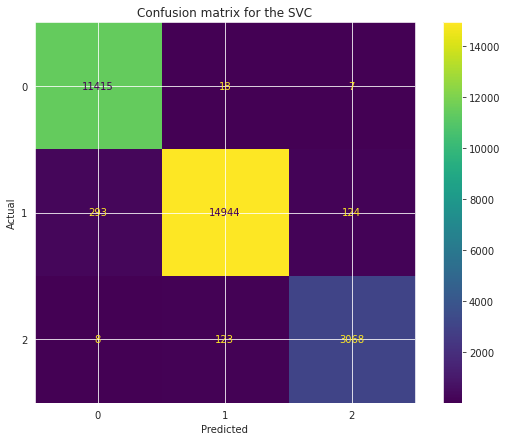

In [ ]:
svc = SVC(C= 9.101481758647843, kernel= 'poly', degree = 7, gamma= 'scale')
svc.fit(X_resampled,y_resampled)
svc_pred = svc.predict(X_test_minmax)

print('\033[1m'+"SVM"+'\033[0m'+"\n\n")
print(classification_report(y_test,svc_pred),"\n\n")

f1_macro['SVC']=f1_score(y_test,svc_pred,average='macro')

print("F1 macro ")
print(f1_macro['SVC'],"\n")

plot_confusion_matrix(svc, X_test_minmax, y_test)  
plt.title('Confusion matrix for the SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  

#### Παρατηρούμε πως έχουμε ιδιαίτερα μεγάλη βελτίωση καθώς και το accuracy και το f1_macro που μας ενδιαφέρουν παρουσιάζουν άνοδο 32 μονάδων accuracy και 50 στο f1_macro. 

##### Στην αναπτυξη του κωδικα μέσω της βιβλιοθήκης Optuna για τους ταξινομητες SVC και MLP δε χρησιμοποιησαμε pipeline για την προεπεξεργασια των δεδομενων. Αντιθετως, πραγματοποιησαμε προεπεξεργασια πριν την εισαγωγη της βιβλιοθηκης βελτιστοποιησης και χρησιμοποιησαμε τα τροποποιημενα data στους ταξινομητες. Ωστοσο, καταβαλαμε μεγαλη προσπαθεια για να βρουμε τον τροπο που θα εισαγωγουμε το pipeline στην Optuna και τελικα τα καταφεραμε αλλα δεν προλαβαιναμε να τρεξουμε τους ταξινομητες με τους διαφορους συνδυασμους στο pipeline. Εν συντομια, στον κώδικα που παρασουσιαζεται παρακατω, εντος του pipe2 μπορουμε να διατηρησουμε οποιους μετασχηματιστες θελουμε και να τεσταρουμε τους συνδυασμους.

In [ ]:
# def objective(trial):
       
#     C = trial.suggest_loguniform('C', 1e-10, 1)
#     kernel = trial.suggest_categorical('kernel',['poly','rbf','sigmoid'])
#     degree = trial.suggest_int('degree',1, 50)
#     gamma = trial.suggest_loguniform('gamma',0.001,10000)

#     pca1 = trial.suggest_int('pca',7,10)
#     selector1 = trial.suggest_float('selector',0,2)
    
#     selector = VarianceThreshold(threshold = selector1)
#     pca = PCA(n_components = pca1)
#     scaler = MinMaxScaler()
#     sampler = RandomUnderSampler()
#     svc = SVC(C=C,kernel=kernel,degree=degree,gamma=gamma)
#     pipe2 = Pipeline(steps=[('selector', selector),('scaler', scaler),('sampler',sampler),('SVM', svc)], memory = 'tmp')

#     pipe2.fit(x_train,y_train)    
#     return pipe2.score(x_test, y_test)

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=10)


### Ιδιαίτερα σημαντική επισήμανση :
#### 
#### Σταματήσαμε το run για την βιβλιοθήκη optuna ston SVM καθώς για να φανεί το output στο notebook που θα παραδώσουμε πρέπει να κάνουμε save το notebook και commit το οποίο ήθελε run all οπότε ξεκινήσαμε το run αργοπορημένα χωρίς να έχουμε υπόψιν την επιλογή quick save. Έτσι θα έπαιρνε πολύ χρόνο η ολοκλήρωση και την σταματήσαμε στην καλύτερη τιμή που παρατηρήσαμε, η οποία σημειωτέον ήταν και η καλύτερη απο όλα τα προηγούμενα runs με n=50 kai n=100 που κάναμε

### Συμπεράσματα - Σχολιασμός
#### 
#### Με βάση την παραπάνω μελέτη εξάγουμε το συμπέρασμα πως ο MLP είναι προτιμότερος του SVM για το συγκεκριμένο dataset καθώς παράγουν παρόμοια scores και στο accuracy και στο f1_macro, όμως οι χρόνοι ολοκλήρωσης της βελτιστοποίησης αλλά και του baseline classification είναι σχεδόν υπερδιπλάσιοι για τον SVM απ ότι για τον MLP πράγμα που απαιτεί μεγαλύτερη υπολογιστική δύναμη αλλά και χρόνο. Προτείνεται λοιπόν ο MLP με το μοντέλο που περιγράφεται παραπάνω.